# Taller de OpenCV 3.3.0 con Python 3
# Entrenando un clasificador por cascada de Haar
## Daniel Mejía Raigosa
### danielmejia55@gmail.com
#### Diciembre 19, 2017

# Daniel Mejía Raigosa

### https://github.com/Daniel-M/Workshop_OpenCV

* https://daniel-m.github.io/
* https://github.com/Daniel-M
* https://bitbucket.org/Daniel-M

![PageTitlePaper](images/ViolaPaper.png)

"*The first contribution of this paper is a new image representation called an integral image that allows for very fast
feature evaluation. Motivated in part by the work of Papageorgiou et al. our detection system does not work directly
with image intensities [10]. Like these authors we use a
set of features which are reminiscent of Haar Basis functions (though we will also use related filters which are more
complex than Haar filters). In order to compute these features very rapidly at many scales we introduce the integral
image representation for images. The integral image can be
computed from an image using a few operations per pixel.
Once computed, any one of these Harr-like features can be
computed at any scale or location in constant time.
*" 

# Imagen Integral

$$
ii(x,y) = \sum_{\alpha \leq x,\, \beta \leq y} i(\alpha,\beta)
$$

![IntegralImage](images/integralImage.png)

"*The second contribution of this paper is a method for
constructing a classifier by selecting a small number of important features using AdaBoost [6]. Within any image subwindow the total number of Harr-like features is very large,
far larger than the number of pixels. In order to ensure fast
classification, the learning process must exclude a large majority of the available features, and focus on a small set of
critical features. Motivated by the work of Tieu and Viola,
*"

"*The third major contribution of this paper is a method
for combining successively more complex classifiers in a
cascade structure which dramatically increases the speed of
the detector by focusing attention on promising regions of
the image."*

"*The simple features used are reminiscent of Haar basis
functions which have been used by Papageorgiou et al. [10].
More specifically, we use three kinds of features. The value
of a two-rectangle feature is the difference between the sum
of the pixels within two rectangular regions. The regions
have the same size and shape and are horizontally or vertically adjacent (see Figure 1). A three-rectangle feature
computes the sum within two outside rectangles subtracted
from the sum in a center rectangle. Finally a four-rectangle
feature computes the difference between diagonal pairs of
rectangles.
Given that the base resolution of the detector is 24x24,
the exhaustive set of rectangle features is quite large, over
180,000 . Note that unlike the Haar basis, the set of rectangle features is overcomplete 1.*" 

# Funciones en la base Haar

$$
\psi(x) = 
\left\{
\begin{array}{c c}
1 & 0 \leq x < \frac{1}{2} \\
-1 & \frac{1}{2} \leq x < 1 \\
0 & \text{lo demás}
\end{array}
\right.
$$

Se tiene la base Haar como,

$$
{\psi}_{j\,k} (x) = \psi \left({2}^{j} \, x - 1\right) \qquad 0 \leq k \leq {2}^{j} \, x - 1
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def psi(x):
    res = 0
    if 0 < x and x < 0.5:
        res = 1
    elif 0.5 < x and x < 1:
        res = -1
    return res

def psi_jk(x,j,k):
    res = psi(np.power(2,j)*x - k)
    return res

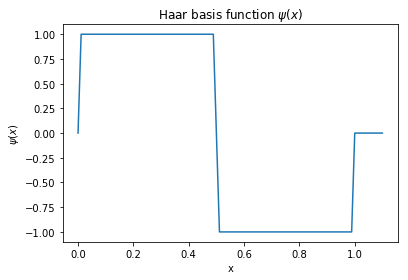

In [3]:
x = np.linspace(0,1.1,num=100)
y = [psi(i) for i in x]

plt.title("Haar basis function $\psi(x)$")
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.plot(x,y)
plt.show()

In [4]:
x = np.linspace(0,1.1,num=100)
y00 = [psi_jk(i,0,0) for i in x]
y10 = [psi_jk(i,1,0) for i in x]
y11 = [psi_jk(i,1,1) for i in x]
y20 = [psi_jk(i,2,0) for i in x]
y21 = [psi_jk(i,2,1) for i in x]
y22 = [psi_jk(i,2,2) for i in x]
y23 = [psi_jk(i,2,3) for i in x]

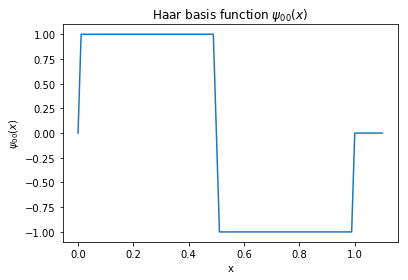

In [5]:
plt.title("Haar basis function ${\psi}_{00}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{00}(x)$")
plt.plot(x,y00)
plt.show()

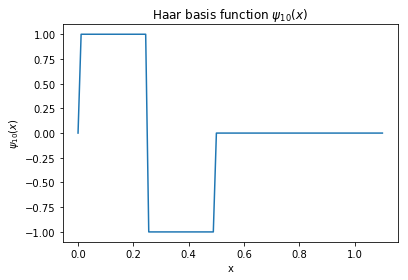

In [6]:
plt.title("Haar basis function ${\psi}_{10}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{10}(x)$")
plt.plot(x,y10)
plt.show()

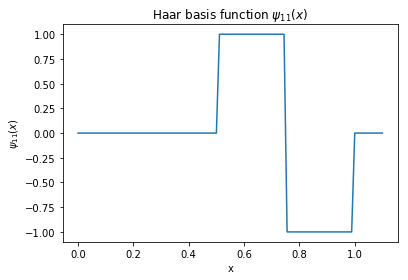

In [7]:
plt.title("Haar basis function ${\psi}_{11}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{11}(x)$")
plt.plot(x,y11)
plt.show()

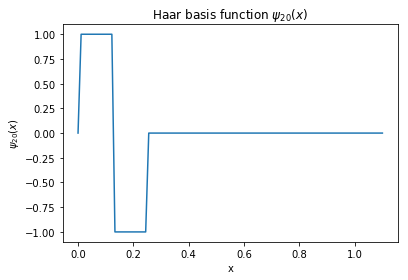

In [8]:
plt.title("Haar basis function ${\psi}_{20}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{20}(x)$")
plt.plot(x,y20)
plt.show()

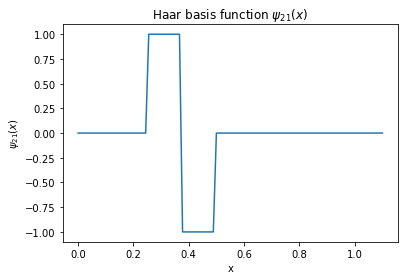

In [9]:
plt.title("Haar basis function ${\psi}_{21}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{21}(x)$")
plt.plot(x,y21)
plt.show()

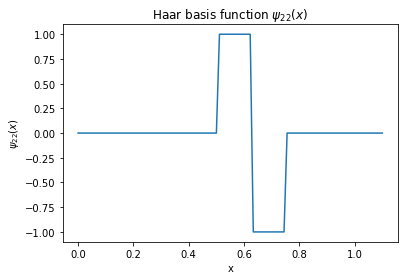

In [10]:
plt.title("Haar basis function ${\psi}_{22}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{22}(x)$")
plt.plot(x,y22)
plt.show()

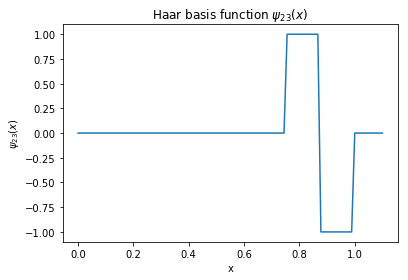

In [11]:
plt.title("Haar basis function ${\psi}_{23}(x)$")
plt.xlabel("x")
plt.ylabel("${\psi}_{23}(x)$")
plt.plot(x,y23)
plt.show()

"*Recall that there are over 180,000 rectangle features as-
sociated with each image sub-window, a number far larger
than the number of pixels. Even though each feature can
be computed very efficiently, computing the complete set is
prohibitively expensive. Our hypothesis, which is borne out
by experiment, is that a very small number of these features
can be combined to form an effective classifier. The main
challenge is to find these features.
In support of this goal, the weak learning algorithm is
designed to select the single rectangle feature which best
separates the positive and negative examples*"

# Detección de características

![featureSelection](images/featureSelection.png)

# Entrenando un clasificador de cascada con HAAR

En OpenCV un clasificador es un algoritmo que puede ser entrenado para detectar cierto objeto particular de nuestro interés (ODI) si se provee una cantidad suficiente de ejemplos del mismo en imágenes. Hasta donde entiendo el clasificador es binario proporcionando un resultado positivo si el objeto de interés se encuentra en una región determinada de la imagen, o negativo de otro modo.
El nombre completo del clasificador que voy a documentar es _cascade of boosted classifiers working with haar-like features_. El nombre _cascade boosted_ hace referencia a que se trata de un conjunto de clasificadores más simple que se aplican en secuencial, y el _boosted_ proviene de determinadas técnicas aplicadas sobre los clasificadores cuya minucia escapa a mi conocimiento al momento de escribir estas líneas.

## Conjunto de datos de entrenamiento

Para entrenar un clasificador con OpenCV se requiere dos conjuntos de datos, a saber,

* Imágenes negativas
* Imágenes positivas

### Imágenes negativas
Imágenes donde el objeto de interés(ODI) no está presente. Pueden, y suelen ser, imágenes aleatorias siempre y cuando no contengan el ODI. Se debe proporcionar un archivo con la ruta absoluta a cada imagen negativa. Por ejemplo, el contenido de `negatives.txt` podría ser,

```
negative_img/img1.jpg
negative_img/img2.jpg
```

### Imágenes positivas
Imagenes que contienen el ODI bien determinado y encuadrado. Es posible disponer de imágenes con la presencia de uno o más ODI cuya ubicación dentro de la imagen puede ser _comentada_ para su uso durante el entrenamiento. El proceso de _comentado_ se puede hacer manualmente indicado para cada imagen:
* La cantidad de objetos (un número entero).  
* las coordenadas `(px,py,lx,ly)` de la caja que encierra a cada objeto, siendo `(px,py)` a la esquina superior izquierda, y `(lx,ly)` longitudes horizontal y vertical correspondientemente.  

## Construcción del conjuntos de datos

La manera más sencilla es disponer de un conjunto de datos es acceder a imagenes seleccionadas previamente clasificadas en alguna base de datos. Normalmente no existen bases de datos para el objeto que nos interese detectar, sin embargo, esta opción está abierta para cuando queramos probar con datos conocidos y estudiados.

El conjunto de datos puede construirse de varias formas, las cuales se detallan a continuación.

### Creando lista de imágenes negativas

La lista de imagenes negativas puede construirse guardando todas las imágenes que no contengan en ODI en un directorio, digamos `neg` y posteriormente crear la lista de archivos utilizando bash

```
find neg -type f -name *.png > negatives_image_list.txt
```

Lo cual puede producir un archivo con el siguiente contenido,

```
neg/img1.png
neg/img2.png
```

### Creando lista de imágenes positivas

Se pueden crear muestras positivas mediante cualquiera de las opciones siguientes,  

* Disponer de una imagen positiva con el ODI y generar más muestras con la herramienta `opencv_createsamples`
* Disponer de un conjunto de imágenes que contengan el ODI y recortarlas sea manualmente.  
* Disponer de un conjunto de imágenes que contengan el ODI y utilizar la herramienta `opencv_annotation` para _comentar_ la ubicación del ODI dentro de un conjunto de imágenes. Esta herramienta crea el archivo con la ruta a las imagenes y los _comentarios_ correspondientes. Esta herramienta abre cada imagen dentro de un directorio y nos permite elegir manualmente la caja que encierra cada ocurrencia del ODI.

#### Desde una imagen positiva con el ODI y generar más muestras con la herramienta `opencv_createsamples`

Tener una imagen que, después de un conjunto de transformaciones y mediante el uso de un conjunto de imagenes de background (las cuales pueden ser las negativas) puede producir imagenes de entrenamiento adicionales mediante la herramienta `opencv_createsamples` el cual recibe las siguientes opciones, 

```
opencv_createsamples command line arguments:

-vec <vec_file_name> : Name of the output file containing the positive samples for training.
-img <image_file_name> : Source object image (e.g., a company logo).
-bg <background_file_name> : Background description file; contains a list of images which are used as a background for randomly distorted versions of the object.
-num <number_of_samples> : Number of positive samples to generate.
-bgcolor <background_color> : Background color (currently grayscale images are assumed); the background color denotes the transparent color. Since there might be compression artifacts, the amount of color tolerance can be specified by -bgthresh. All pixels withing bgcolor-bgthresh and bgcolor+bgthresh range are interpreted as transparent.
-bgthresh <background_color_threshold>
-inv : If specified, colors will be inverted.
-randinv : If specified, colors will be inverted randomly.
-maxidev <max_intensity_deviation> : Maximal intensity deviation of pixels in foreground samples.
-maxxangle <max_x_rotation_angle> : Maximal rotation angle towards x-axis, must be given in radians.
-maxyangle <max_y_rotation_angle> : Maximal rotation angle towards y-axis, must be given in radians.
-maxzangle <max_z_rotation_angle> : Maximal rotation angle towards z-axis, must be given in radians.
-show : Useful debugging option. If specified, each sample will be shown. Pressing Esc will continue the samples creation process without showing each sample.
-w <sample_width> : Width (in pixels) of the output samples.
-h <sample_height> : Height (in pixels) of the output samples.
```

Este método es recomendado cuando el ODI es un objeto rígido que no cambia de morfología, por ejemplo, un logotipo. Esto debido a que `opencv_createsamples` produce transformaciones de percepción las cuales no contemplan cambios de forma.

#### Disponer de un conjunto de imágenes que contengan el ODI y anotarlas manualmente

Este proceso puede lograrse de muchas formas diferentes y escapa a mi interés detallarlo, sin embargo, al final debemos tener una lista de imágenes,

```
pos/img1.jpg  1  140 100 45 45
pos/img2.jpg  2  100 200 50 50   50 30 25 25
```

#### Disponer de un conjunto de imágenes del mismo tamaño que contengan el ODI (y solo uno)

Este proceso puede lograrse de muchas formas diferentes y escapa a mi interés detallarlo. Por ejemplo si las imagenes del ODI son de 45x45, debemos tener una lista de imágenes en `positives.txt` como,

```
pos/img1.jpg  1  0 0 45 45
pos/img2.jpg  1  0 0 45 45
```

#### Disponer de un conjunto de imágenes que contengan el ODI y utilizar la herramienta `opencv_annotation`

La herramienta de anotación o comentado es `opencv_annotation`. El proceso consiste en tener todas las imagenes bajo un directorio, digamos `pos`.

```
project/pos/
            img1.jpg
            img2.jpg
project/annotations.txt
```

e invocando con las rutas absolutas,

```
opencv_annotation --annotations=/full_path_to/project/annotations.txt --images=/full_path_to/project/pos
```

Lo cual abrirá una interfaz que mostrará las siguientes opciones en la consola

```
* mark rectangles with the left mouse button,
* press 'c' to accept a selection,
* press 'd' to delete the latest selection,
* press 'n' to proceed with next image,
* press 'esc' to stop.
```

Además de mostrar la interfaz (el ODI ha sido ya seleccionado y confirmado con `c`, por eso se muestra el rectángulo verde),

![Interfaz de anotación](images/annotation_tool.png)

y mediante una paciente selección del ODI en cada imagen terminaremos con un archivo adecuadamente anotado.

## Creando archivo binario `vec` con las muestras (samples) anotadas previamente

Para crear el archivo binario con el cual se entrenará la cascada se requiere del conjunto de imágenes positivas correctamente anotado como se indicó anteriormente. Dado que se dispone de un conjunto de imagenes positivas anotadas, se procede a utilizar la herramienta `opencv_createsamples`(ver más arriba) pero ingresando el argumento `-info` indicando el archivo que contiene las anotaciones. Al usar `-info` el resto de opciones quedan invalidadas y son ignoradas, excepto, las opciones  `-w`, `-h`, `-show` y `-num`.

En nuestro caso lo habíamos llamado `positives.txt`. Queremos visualizar el entrenamiento utilizando muestras (samples) de 28x28, que serán guardadas en el archivo binario `samples_train.vec`. Se utiliza la herramienta `opencv_createsamples` como sigue,

```
opencv_createsamples -info positives.txt -vec samples_train.vec -w 28 -h 28 -num 1000
```

Donde las opciones indican que las imagenes generadas van a tener un tamaño de 28x28 en el archivo binario `samples_train.vec` y que se generarán 1000 samples

## Entrenando la cascada

El proceso de entrenamiento consiste de un número dado de *stages* (20 por defecto) a través de los cuales se va mejorando el clasificador. El resultado de cada stage se almacena en un archivo xml específico de OpenCV. al finalizar el entrenamiento la cascada completa se almacena en un archivo con nombre "cascade.xml"(**Nota:** No estoy seguro si este nombre se hereda del nombre de la carpeta que almacena los directorios.)
Para inciar el entrenamiento de la casacada es necesario crear el directorio donde se alamacenarán los xml.
orre el siguiente comando

Para entrenar la cascada solo resta utilizar el binario anterior, las imagenes negativas, y crear un directorio en el cual se almacenarán los xml de cada stage del entrenamiento.
La herramienta que se utilizará es `opencv_traincascade` la cual contiene el conjunto de opciones

```
opencv_traincascade common arguments:
-data <cascade_dir_name> : Where the trained classifier should be stored. This folder should be created manually beforehand.
-vec <vec_file_name> : vec-file with positive samples (created by opencv_createsamples utility).
-bg <background_file_name> : Background description file. This is the file containing the negative sample images.
-numPos <number_of_positive_samples> : Number of positive samples used in training for every classifier stage.
-numNeg <number_of_negative_samples> : Number of negative samples used in training for every classifier stage.
-numStages <number_of_stages> : Number of cascade stages to be trained.
-precalcValBufSize <precalculated_vals_buffer_size_in_Mb> : Size of buffer for precalculated feature values (in Mb). The more memory you assign the faster the training process, however keep in mind that -precalcValBufSize and -precalcIdxBufSize combined should not exceed you available system memory.
-precalcIdxBufSize <precalculated_idxs_buffer_size_in_Mb> : Size of buffer for precalculated feature indices (in Mb). The more memory you assign the faster the training process, however keep in mind that -precalcValBufSize and -precalcIdxBufSize combined should not exceed you available system memory.
```

```
-baseFormatSave : This argument is actual in case of Haar-like features. If it is specified, the cascade will be saved in the old format. This is only available for backwards compatibility reasons and to allow users stuck to the old deprecated interface, to at least train models using the newer interface.
-numThreads <max_number_of_threads> : Maximum number of threads to use during training. Notice that the actual number of used threads may be lower, depending on your machine and compilation options. By default, the maximum available threads are selected if you built OpenCV with TBB support, which is needed for this optimization.
-acceptanceRatioBreakValue <break_value> : This argument is used to determine how precise your model should keep learning and when to stop. A good guideline is to train not further than 10e-5, to ensure the model does not overtrain on your training data. By default this value is set to -1 to disable this feature.
Cascade parameters:
-stageType <BOOST(default)> : Type of stages. Only boosted classifiers are supported as a stage type at the moment.
-featureType<{HAAR(default), LBP}> : Type of features: HAAR - Haar-like features, LBP - local binary patterns.
-w <sampleWidth> : Width of training samples (in pixels). Must have exactly the same value as used during training samples creation (opencv_createsamples utility).
-h <sampleHeight> : Height of training samples (in pixels). Must have exactly the same value as used during training samples creation (opencv_createsamples utility).
Boosted classifer parameters:
-bt <{DAB, RAB, LB, GAB(default)}> : Type of boosted classifiers: DAB - Discrete AdaBoost, RAB - Real AdaBoost, LB - LogitBoost, GAB - Gentle AdaBoost.
-minHitRate <min_hit_rate> : Minimal desired hit rate for each stage of the classifier. Overall hit rate may be estimated as (min_hit_rate ^ number_of_stages)
```

```
mkdir cascade
opencv_traincascade -data cascade/ -vec samples_train.vec -bg negatives.txt -w 28 -h 28 -numPos 42
```

Nos debe mostrar un mensaje

```
PARAMETERS:
cascadeDirName: /home/damejia/Escritorio/pina_training/cup_HAAR/cascade/
vecFileName: /home/damejia/Escritorio/pina_training/cup_HAAR/sampled_vector.vec
bgFileName: /home/damejia/Escritorio/pina_training/cup_HAAR/negative_images.txt
numPos: 42
numNeg: 1000
numStages: 20
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 24
sampleHeight: 24
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: BASIC
Number of unique features given windowSize [24,24] : 162336

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   42 : 42
NEG count : acceptanceRatio    1000 : 1

```

## Sobre la relación entre positivas y negativas para el entrenamiento

La referencia [10] sugiere que la relación entre positivas y negativas debe aproximadamente 2:1 es decir positivas:negativas ~ 2:1

Sin embargo, la referencia [9] discute que hay una relación matemática de caracter general entre el número de imagenes negativas `numNeg` y el número de imagenes positivas que se pueden ingresar `numPos`, dada la disponibilidad de imágenes positivas en el conjunto de datos.

La relación es más o menos la siguiente

$$
\text{Available data} \ge \text{numPos} (1 + (\text{numStages} - 1)(1-\text{minHitRate})) + \text{S}
$$

Donde $S$ es el número de muestras que puede identificarse como background en el archivo vectorial. Supongo que hacen referencia al número de negativas pues en el archivo vectorial solo se almacenan positivas. En lo que sigue está un fragmento de la mencionada referencia,

Tomado de [9]
    
    The problem is that your vec-file has exactly the same samples count that you passed in command line -numPos 979. Training application used all samples from the vec-file to train 0-stage and it can not get new positive samples for the next stage training because vec-file is over. The bug of traincascade is that it had assert() in such cases, but it has to throw an exception with error message for a user. It was fixed in r8913. -numPose is a samples count that is used to train each stage. Some already used samples can be filtered by each previous stage (ie recognized as background), but no more than (1 - minHitRate) * numPose on each stage. So vec-file has to contain >= (numPose + (numStages-1) * (1 - minHitRate) * numPose) + S, where S is a count of samples from vec-file that can be recognized as background right away. I hope it can help you to create vec-file of correct size and chose right numPos value.

It worked for me. I also had same problem, I was following the famous tutorial on HAAR training but wanted to try the newer training utility with -npos 7000 -nneg 2973

so i did following calcs:

vec-file has to contain >= (numPos + (numStages-1) * (1 - minHitRate) * numPos) + S

    7000 >= (numPos + (20-1) * (1 - 0.999) * numPos) + 2973

    (7000 - 2973)/(1 + 19*0.001) >= numPos

    numPos <= 4027/1.019

    numPos <= 3951 ~~ 3950
    and used:

    -npos 3950 -nneg 2973

It works. I also noticed that [others have also had success with reducing numPos](https://stackoverflow.com/questions/10961763/haartraining-with-opencv-error/12271213#12271213)

## Estimando numPos

Para estimar el número de `numPos` que se va emplear en función del `numNeg` y del `minHitRate` cree la siguiente función,

In [12]:
def numPos(TotalPositives,numNeg,stages,minHitRate):
    return (TotalPositives-numNeg)/(1+(stages-1)*(1-minHitRate))

Así, para una muestra de 4416 imagenes positivas en total(en el archivo binario vectorial), con 600 negativas en total (de acuerdo a la lista de anotaciones), para 20 stages y con un minHitRate de 0.999 se le deben pasar,

In [13]:
numPos(4416,600,20,0.999)

3744.8478900883215

Por lo tanto, en `opencv_traincascade` se le deben ingresar los argumentos `--numPos 3744` y `--numNeg 600` para un entrenamiento, en teoría, garantizado.

Por ejemplo, para un conjunto muy pequeño de 52 imágenes positivas, bastará pasar `--numPos 41` y `--numNeg 10`
tal como lo sugiere el cálculo,

In [14]:
numPos(52,10,20,0.999)

41.216879293424924

## Referencias

Documentación principal
* [1] https://docs.opencv.org/3.3.0/dc/d88/tutorial_traincascade.html  
* [2] https://docs.opencv.org/3.0-beta/modules/objdetect/doc/cascade_classification.html  
* [3] http://www.technolabsz.com/2011/08/how-to-do-opencv-haar-training.html  

Tutorial de cómo cargar y utilizar un xml de un clasificador ya entrenado (c++)
* [4] https://docs.opencv.org/3.3.0/db/d28/tutorial_cascade_classifier.html  

Algunos tutoriales relacionados (y algo desactualizados)
* [5] http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html  
* [6] https://github.com/dan-silver/haar-classifier-generator  
* [7] http://note.sonots.com/SciSoftware/haartraining.html  
* [8] https://www.cs.auckland.ac.nz/~m.rezaei/Tutorials/Creating_a_Cascade_of_Haar-Like_Classifiers_Step_by_Step.pdf  

Stackoverflow relacionados,

* [9] https://stackoverflow.com/questions/10863560/haar-training-opencv-assertion-failed
* [10] https://stackoverflow.com/questions/16058080/how-to-train-cascade-properly

Bases de datos,

* [University of South Florida, Digital Mammography Home Page](http://marathon.csee.usf.edu/Mammography/Database.html)  
* [Github](http://github.com)